# Exemplo - Multilayer Perceptron com TensorFlow

### Problema: Classificação de flores Iris

Atributos presentes no dataset:
1. comprimento da sépala em cm
2. largura da sépala em cm
3. comprimento da pétala em cm
4. largura da pétala em cm
5. classe:
    - Iris Setosa
    - Iris Versicolor
    - Iris Virgínia

#### Objetivo: Classificar uma flor Iris com base em suas medidas


<div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/1200px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width="200" height="200" /> 
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg" width="200" height="200" />
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1200px-Iris_virginica_2.jpg" width="200" height="200" /> </div>

 Iris Setosa, Iris Versicolor, Iris Virginica, respectivamente.

## 1. Importando bibliotecas

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. Carregando dataset

In [2]:
df = pd.read_csv('iris.data')

### 2.1. Visualizando as 5 primeiras linhas do dataset

In [3]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### 2.2. Dividindo o dataset em atributos e classes

In [4]:
X = df.iloc[:, 0:4].values # Atributos/Features
y = df.iloc[:, 4].values # Classes/Labels

In [5]:
df.iloc[:, 4].unique() #visualizando as classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 3. Dividindo o dataset em treino e teste 

In [6]:
# Dividindo os dados em treino e teste em 80% e 20% respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

# Padronizando os dados de entrada (X) para média 0 e desvio padrão 1
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Convertendo as classes em valores numéricos 
# Uma classe será representada por um vetor de 3 posições, onde apenas uma posição será 1 e as outras 0
# Exemplo: Iris-setosa = [1, 0, 0]
#          Iris-versicolor = [0, 1, 0]
#          Iris-virginica = [0, 0, 1]
# Fazemos isso, pois o algoritmo de aprendizado de máquina espera os dados sejam representadas por valores numéricos
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values


## 4. Criando o modelo

In [10]:
# Modelo de rede perceptron multicamadas com uma camada oculta de 64 neurônios
# e camada de saída com 3 neurônios (3 classes)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.summary() #visualizando o modelo

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


### 4.1. Compilando o modelo

In [11]:
# Compile model
# Otimizador Adam com taxa de aprendizado de 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# Função de custo categorical_crossentropy (para problemas de classificação com mais de duas classes)
# Métrica de avaliação MSE (Mean Squared Error)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['mse'])

### 4.2. Treinando o modelo

In [10]:
# Train model
history = model.fit(X_train_std, y_train_onehot, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
10/10 [==============================] - 7s 94ms/step - loss: 1.0777 - mse: 0.2161 - val_loss: 0.7840 - val_mse: 0.1504
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 0.6753 - mse: 0.1267 - val_loss: 0.5236 - val_mse: 0.0942
Epoch 3/100
10/10 [==============================] - 0s 21ms/step - loss: 0.4972 - mse: 0.0926 - val_loss: 0.3934 - val_mse: 0.0682
Epoch 4/100
10/10 [==============================] - 0s 21ms/step - loss: 0.4037 - mse: 0.0753 - val_loss: 0.3214 - val_mse: 0.0544
Epoch 5/100
10/10 [==============================] - 0s 19ms/step - loss: 0.3510 - mse: 0.0658 - val_loss: 0.2735 - val_mse: 0.0441
Epoch 6/100
10/10 [==============================] - 0s 21ms/step - loss: 0.3144 - mse: 0.0578 - val_loss: 0.2381 - val_mse: 0.0379
Epoch 7/100
10/10 [==============================] - 0s 20ms/step - loss: 0.2817 - mse: 0.0514 - val_loss: 0.2115 - val_mse: 0.0325
Epoch 8/100
10/10 [==============================] - 0s 26ms/step - loss: 0.

## 5. Visualizando o erro

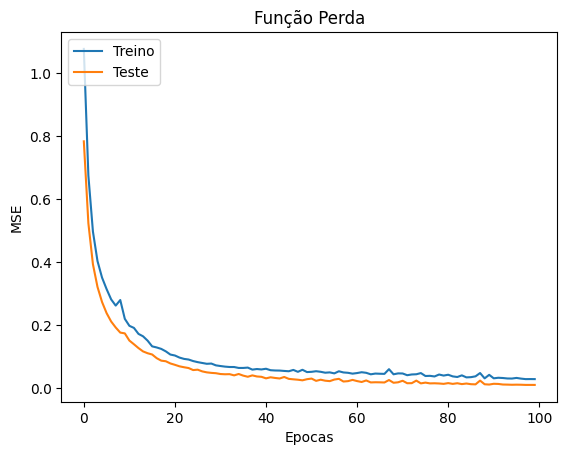

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Função Perda')
plt.ylabel('MSE')
plt.xlabel('Epocas')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()


## 6. Testando o modelo

In [12]:
teste = np.array([[5.1, 3.5, 1.4, 0.2]])
teste = sc.transform(teste)
# Predict
"""
    1 - Iris-setosa
    2 - Iris-versicolor 
    3 - Iris-virginica
"""
y_predd = model.predict(teste)
y_predd = np.argmax(y_predd, axis=1)+1 
print("A classe é:",  y_predd[-1])

1/1 [==============================] - 1s 970ms/step
A classe é: 1
